## Theory

The **Black-Scholes-Merton formula** (analytical) for pricing european options is

> $Call = S\ N1 - K\ e^{-rT}\ N2 $<br>

where:<br>
$d1 = \frac{log \frac{S}{K}\ \ +\ \ (r + \frac{σ^2}{2})\ T}{σ \sqrt T }$<br>
$d2 = d1 - σ \sqrt{T}$<br>
$N1 = norm.cdf(d1,0,1)$<br>
$N2 = norm.cdf(d2,0,1)$<br>

For the **Monte Carlo simulations**, we can use the Euler's discretization of Black-Scholes-Merton SDE, 
i.e. lognormal stock price evolving according to the following eq.

> $S_{t+1} = S_t\ exp\big( (r - \frac{σ^2}{2}) dt \ +  \ σ \sqrt{dt}\ z\big)$

where:<br>
the standard error, $\epsilon = \frac {\sigma_N} {\sqrt{N}}$<br>

95% confidence interval for the option price,
$\mu - \frac {1.96\ \sigma_N}{\sqrt N} < P < \mu + \frac {1.96\ \sigma_N}{\sqrt N}$

In case of the **Asian options**, we can use analytic solutions for geometric options, but for the arithmetic asians, only approximations exist.
In the latter case, we can always resort to ***Monte Carlo simulations***. 

The Asians' payoffs are:

> $Fixed\ Strike\ Call = e^{-rT} Max(\bar S - K, 0)$<br>

> $Floating\ Strike\ Call = e^{-rT} Max(S_T - \bar S, 0)$<br>

where:<br>
$arithmetic\ mean,\ \bar S_A(0,T) = \frac{1}{N} \sum \limits_{i=1}^{N} S_{t_i}\ or\ \frac{1}{T}\int\limits_o^T S(t)\ dt\ for\ cont.$<br>
$geometric\ mean,\ \bar S_G(0,T) = exp\Bigg( \frac{1}{N} \sum\limits_{i=1}^{T} log S_{t_i} \Bigg)\ or\ exp\Bigg( \frac{1}{T}\int\limits_o^T log S(t)\ dt\ \Bigg)\ for\ cont.$<br>

The Asian fixed strike geometric can be computed with the ***Kemna and Vorst solution***:

> $C_{(fixed\ strike\ geom)} = S e^{ (b - r) T} N1  -  K  e^{-r T} N2$

where<br>
$σ_a = \frac{σ}{\sqrt(3)}$<br>
$b = 0.5 * (r - \frac{σ^2}{6})$<br>
$d1 = \frac{log(\frac{S}{K}) + (b + 0.5 σ_a^2) T}{σ_a \sqrt(T)}$<br>
$d2 = d1 - σ_a \sqrt T$<br>
$N1 = norm.cdf(d1,0,1)$<br>
$N2 = norm.cdf(d2,0,1)$<br>

The Asian fixed strike arithmetic can be computed with the ***Levy approximation***.

> $C_{Levy} = S_Z N1 - K_Z e^{-rT} N2$

where<br>
$M1 = 2 S^2$,
$M2 = r + σ^2$,
$M3 = (2 r + σ^2)T$,
$M4 = 2 r + σ^2$,
$M5 = r T$,
$M = \frac{M1}{M2}\big[\frac{e^{M3} - 1}{M4} - \frac{e^{M5} - 1}{r}\big]$<br>
$L = \frac{M}{T^2}$<br>
$S_Z = \frac {S}{r*T}\big(1 - e^{-rT}\big)$<br>
$K_Z = K$<br>
$ν = log(L) - 2\big(r T + log(S_Z)\big)$<br>
$d1 = \frac{1}{\sqrt ν}\big[0.5 log(L) - log(K_Z)\big]$<br>
$d2 = d1 - \sqrt ν$<br>
$N1 = norm.cdf(d1,0,1)$<br>
$N2 = norm.cdf(d2,0,1)$<br>
    

The ***Asian floating strike geometric***.

> $C_{(floating\ strike\ geom)} = S N1  -  S e^{\big( \frac{-(r\ +\ 0.5 σ^2)\ T}{2}  + \frac{σ^2\ T}{6} \big)} N2$

where<br>
$d1 = \frac {(r\ +\ 0.5 σ^2)\ T^2/2} {σ \sqrt {T^3/3}}$<br>
$d2 = d1 - σ \sqrt {T^3/3}$<br>
$N1 = norm.cdf(d1,0,1)$<br>
$N2 = norm.cdf(d2,0,1)$<br>

The ***Asian floating strike arithmetic***, again, can be computed with the Monte Carlo simulation with the following update rules,

Geometric mean,
$
G_i = \frac{i-1}{i} G_{i-1} + \frac {1}{i} log S_i
$

Arrithmetic mean,
$
A_i = \frac{i-1}{i} A_{i-1} + \frac {1}{i} S_i
$

*Relationships for verification:* 
- *the Asian options are cheaper than plain vanilla options $\because$ the Asian option volatilities are lower than the others due to averaging*
- $C_{arith}^{fixed} \geq C_{geom}^{fixed}\ and\ C_{arith}^{float} \leq C_{geom}^{float} \because\ \bar A_{Geometric} \leq \bar A_{Arithmetic}\ $

The **Volatility** in the BSM models used for pricing options is assumed to be constant over time. 
However, in real financial markets, volatility changes dramatically from time to time. 
Therefore, to be closer to reality, we can also apply stochastic volatility to MC simulations.

The volatility can be described to follow a stochastic process too, ie<br>
the underlying asset, $dS = r S dt + \sigma S dz$<br>
the volatility, $d\sigma^2 = \mu \sigma^2 dt + \xi \sigma^2 dw$ (Hull-White model)<br>
where, $\xi$ is assumed constant, dz and dw have a correlation $\rho$ which in deriving option prices can be effectively assumed to be $\rho = 0$.

One way to calculate the option price based on stochastic volatility is to simulate the volatility in the same way as for the stock price. The stochastic process for volatility becomes:
> $\sigma^2_{t+1} = \sigma^2_t\ exp\big( (\mu - \frac{\xi^2}{2})\ dt \ +  \ \xi \sqrt{dt}\ z\big)$

for the mean-reverting process, $\mu = \alpha\ (\sigma^{lt} - \sigma)$, $\alpha$ - speed of the mean-reversion, $\sigma^{lt}$  - long-term volatility, $\xi$ - volatility of volatility.


## Comparison of the values obtained by BSM formula and MC simulation based on the Euler scheme

In [11]:
import numpy as np
from scipy.stats import norm

# common parameters to compute various option prices
S0 = 100 # current price
K = 100 # strike
r = 0.05 # risk free rate %
T = 1 # a fraction of a year
σ = 0.2 # volatility %
Ts = 260 # num of time steps
N = 10000 # num of paths

In [14]:
#
# Euro call options
#

def bsm_euro_call_value(S0, K, T, r, σ):
    """Prices the European call option with analytical BSM formula.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term

    Returns
        Call Value: present value of the European call option
            
    """

    d1 = (np.log(S0 / K) + (r + 0.5 * σ**2) * T) / (σ * np.sqrt(T))
    d2 = d1 - σ * np.sqrt(T)
    N1 = norm.cdf(d1,0,1)
    N2 = norm.cdf(d2,0,1)
    C0 = S0 * N1 - K * N2 * np.exp(-r*T)

    return C0

def mc_euro_call_value(S0, K, T, r, σ, Ts=260, N=100000):
    """Prices the European call option with numerical MC simulation.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths

    Returns
        Call Value: present value (time=0) of the European call option
            
    """
  
    dt = T / Ts # time step
    S = np.zeros((Ts + 1, N))
    S[0] = S0
    
    # Euler's discretization of B-S-M SDE
    for t in range(1, Ts + 1):
        z = np.random.standard_normal(N)  
        S[t] = S[t-1] * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )

    C0 = np.exp(-r*T) * np.mean(np.maximum(S[-1] - K, 0))

    return C0

In [15]:
bsm_euro_call_value(S0,K,T,r,σ)

10.450583572185572

In [16]:
mc_euro_call_value(S0,K,T,r,σ,Ts,N)

10.417662320281956

## Asian Fixed Strike Options

In [17]:
#
# Asian fixed strike geometric call options
#

def kv_asian_fixed_strike_geome_call_value(S0, K, T, r, σ):
    """Prices the Asian fixed strike geometric call option with analytical (Kemna and Vorst) formula.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term

    Returns
        Call Value: present value of the Asian fixed strike geometric call option
            
    """
    
    σ_a = σ / np.sqrt(3)
    b = 0.5 * (r - σ**2 / 6)
    d1 = (np.log(S0 / K) + (b + 0.5 * σ_a**2) * T) / (σ_a * np.sqrt(T))
    d2 = d1 - σ_a * np.sqrt(T)
    N1 = norm.cdf(d1,0,1)
    N2 = norm.cdf(d2,0,1)
    C0 = S0 * np.exp((b - r) * T) * N1  -  K * np.exp(-r*T) * N2

    return C0



def mc_asian_fixed_strike_geome_call_value(S0, K, T, r, σ, Ts=260, N=100000):
    """Prices the Asian fixed strike geometric call option with numerical MC simulation.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian fixed strike geometric call option
        
    """

    dt = T / Ts # time step
    S = np.zeros((Ts + 1, N))
    S[0] = S0
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal(N) 
        S[t] = S[t-1] * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )

    C0 = np.exp(-r*T) * np.mean(np.maximum( np.exp(np.mean(np.log(S),axis=0)) - K, 0 ))        
    
    return C0



def mc_wur_asian_fixed_strike_geome_call_value(S0, K, T, r, σ, Ts=260, N=100000, ret_err=False):
    """Prices the Asian fixed strike geometric call option with numerical MC simulation with upating rule.
    
    Compared to mc_asian_fixed_strike_arith_call_value(), 
    this function uses the update rule, which allows it to keep in memory only the last mean values, 
    and so more time steps (approaching continuous sampling) can be used.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian fixed strike geometric call option
        
    """
    
    dt = T / Ts # one time step   
    S = S0 * np.ones((1,N)) # holds spot prices
    M = S0 * np.ones((1,N)) # holds means for each path
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal((1,N))
        S = S * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )
        M = M * (t-1)/t + np.log(S)/t

    N_path_values = np.maximum(np.exp(M) - K, 0)      
    C0 = np.exp(-r*T) * np.mean(N_path_values)
  
    if ret_err:
        return C0, np.std(N_path_values)/np.sqrt(N)
    else:
        return C0


In [22]:

#
# Asian fixed strike arithmetic call options
#

def levy_asian_fixed_strike_arith_call_value(S0, K, T, r, σ):
    """Prices the Asian fixed strike arithmetic call option with analytical formula (Levy approximation).
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term

    Returns
        Call Value: present value of the Asian fixed strike arithmetic call option
        
    """   
    
    M1 = 2 * S0**2
    M2 = r + (σ**2)
    M3 = (2 * r + σ**2)*T
    M4 = 2 * r + σ**2
    M5 = r * T
    M = (M1/M2) * ( (np.exp(M3) - 1)/M4  -  (np.exp(M5) - 1)/r )
    L = M / (T**2)
    
    S_Z = S0 * (1 - np.exp(-r*T)) / (r*T)
    ν = np.log(L) - 2 * (r*T + np.log(S_Z))
    K_Z = K
    
    d1 = (0.5 * np.log(L)  -  np.log(K_Z)) / np.sqrt(ν)
    d2 = d1 - np.sqrt(ν)
    N1 = norm.cdf(d1,0,1)
    N2 = norm.cdf(d2,0,1)
    C0 = S_Z * N1 - K_Z * np.exp(-r*T) * N2
    
    return C0



def mc_asian_fixed_strike_arith_call_value(S0, K, T, r, σ, Ts=260, N=100000):
    """Prices the Asian fixed strike arithmetic call option with numerical MC simulation.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian geometric call option
    """

    dt = T / Ts # one time step   
    S = np.zeros((Ts + 1, N))
    S[0] = S0
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal(N) 
        S[t] = S[t - 1] * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )

    C0 = np.exp(-r*T) * np.mean( np.maximum( np.mean(S,axis=0) - K, 0 ) )        
    
    return C0



def mc_wur_asian_fixed_strike_arith_call_value(S0, K, T, r, σ, Ts=260, N=100000, ret_err=False):
    """Prices the Asian fixed strike arithmetic call option with numerical MC simulation and with upating rule.
    
    Compared to mc_asian_fixed_strike_arith_call_value(), 
    this function uses the update rule, which allows it to keep in memory only the last mean values, 
    and so more time steps (approaching continuous sampling) can be used.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian geometric call option
    """

    dt = T / Ts # one time step   
    S = S0 * np.ones((1,N)) # holds spot prices
    M = S0 * np.ones((1,N)) # holds means for each path
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal((1,N))
        S = S * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )
        M = M * (t-1)/t + S/t

    N_path_values = np.maximum(M - K, 0)
    C0 = np.exp(-r*T) * np.mean(N_path_values)
    
    if ret_err:
        return C0, np.std(N_path_values)/np.sqrt(N)
    else:
        return C0



def mc_wur_wsv_asian_fixed_strike_arith_call_value(S0, K, T, r, α, σ_lt, σ, ξ, Ts=260, N=100000, ret_err=False):    
    """Prices the Asian fixed strike arithmetic call option with numerical MC simulation and with upating rule.
    The volatility is assumed to be stochastic.
    
    Compared to mc_asian_fixed_strike_arith_call_value(), 
    this function uses the update rule, which allows it to keep in memory only the last mean values, 
    and so more time steps (approaching continuous sampling) can be used.
    
    Parameters
        S0: initial stock/index level
        K:  strike price
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        α:  speed of mean-reversion
        σ_lt:  long term volatility
        σ:  volatility
        ξ:  volatility of volatility
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian geometric call option with stochastic voloatility
    """

    dt = T / Ts # one time step  
    σ_lt = σ_lt * np.ones((1,N))
    σ2 = σ**2 * np.ones((1,N)) # holds volatilities
    S = S0 * np.ones((1,N)) # holds spot prices
    M = S0 * np.ones((1,N)) # holds means for each path
    
    for t in range(1, Ts + 1):
        
        z = np.random.standard_normal((1,N))
        
        σ2 = σ2 * np.exp( (α*(σ_lt-np.sqrt(σ2)) - 0.5 * ξ**2) * dt   +   ξ * np.sqrt(dt) * z )
        S = S * np.exp( (r - 0.5 * σ2) * dt  +  np.sqrt(σ2) * np.sqrt(dt) * z )
        
        M = M * (t-1)/t + S/t
        

    N_path_values = np.maximum(M - K, 0)
    C0 = np.exp(-r*T) * np.mean(N_path_values)
    
    if ret_err:
        return C0, np.std(N_path_values)/np.sqrt(N)
    else:
        return C0
    

In [23]:
kv_asian_fixed_strike_geome_call_value(S0,K,T,r,σ)

5.546818633789201

In [24]:
mc_asian_fixed_strike_geome_call_value(S0,K,T,r,σ,Ts,N)

5.519245436545222

In [25]:
# bump up the number of time steps (to see the effect of increased averaging)
mc_wur_asian_fixed_strike_geome_call_value(S0,K,T,r,σ,Ts=Ts*24,N=N) # 24 a day

5.412903778041238

In [26]:
levy_asian_fixed_strike_arith_call_value(S0,K,T,r,σ)

5.782838338049999

In [27]:
mc_asian_fixed_strike_arith_call_value(S0,K,T,r,σ,Ts,N)

5.5687221264531175

In [28]:
# bump up the number of time steps (to see the effect of increased averaging)
mc_wur_asian_fixed_strike_arith_call_value(S0,K,T,r,σ,Ts=Ts*24,N=N) # 24 a day

5.816611098573083

In [29]:
# analayze the impact of stochastic volatility on the option price

α = 10     # speed of mean-reverting process
σ_lt = 0.2  # long-term volatility
ξ = 0.3     # volatility of volatility

data = []
# σ is the starting volatility
for σ in [0.1,0.2,0.3,0.4,0.5,0.6]:
    levy_appox = levy_asian_fixed_strike_arith_call_value(S0,K,T,r,σ)
    mc_cv, mc_se = mc_wur_wsv_asian_fixed_strike_arith_call_value(S0, K, T, r, α=α, σ_lt=σ_lt, σ=σ, ξ=ξ, Ts=Ts, N=10000, ret_err=True)
    data.append((100*σ, # starting volatility value
                 levy_appox, # Levy approx
                 mc_cv, # MC call value
                 mc_se, # std err
                 mc_cv - 1.96 * mc_se / np.sqrt(N), # lower bound
                 mc_cv + 1.96 * mc_se / np.sqrt(N), # upper bound
                 100 * (levy_appox - mc_cv) / levy_appox,  # pricing diff %
               ))
    
    
σ = 0.2 # reset volatility to 20%

df = pd.DataFrame(data,columns=['Volatility %','Levy Approx','MC Simulation','Standard Error','Lower Bound','Upper Bound','Pricing Diff %'])
df

,Volatility %,Levy Approx,MC Simulation,Standard Error,Lower Bound,Upper Bound,Pricing Diff %
0,10.0,3.647479,4.505930,0.055896,4.504835,4.507026,-23.535459
1,20.0,5.782838,6.746882,0.095775,6.745005,6.748759,-16.670775
2,30.0,7.992520,8.598692,0.130098,8.596142,8.601242,-7.584238
3,40.0,10.230318,10.184716,0.159285,10.181594,10.187838,0.445752
4,50.0,12.489537,12.122832,0.197276,12.118966,12.126699,2.936093
5,60.0,14.770189,13.415148,0.222690,13.410783,13.419513,9.174162


Notes: 
- the values of asians simulated with MC correspond to those obtained with the analytical formulas 
- $C_{arith}^{fixed} \geq C_{geom}^{fixed}$
- the more time steps the less the option price, as it seems that more frequent averaging reduces volatility
- with the volatility increase, the call price and std errors increase too
- tha Levy approximation with constant volatility, compared to MC with stochastic volatility, seems to over-estimate option values for high volatilities and under-estimate them for low ones

## Asian Floating Strike Options

In [31]:

#
# Asian floating strike geometric call options
#


def asian_floating_strike_geom_call_value(S0, T, r, σ):
    """Prices the Asian floating strike geometric call option with analytical formula.
    
    This formula has been taken from the dissertaion 
    "Theoretical and Numerical Schemes for Pricing Exotics" by Stavri, Ahmad     
    
    Parameters
        S0: initial stock/index level
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term

    Returns
        Call value: present value of the Asian floating strike geometric call option
            
    """
    
    d1 = (r + 0.5 * σ**2) * T**2/2 / (σ * np.sqrt(T**3/3))
    d2 = d1  -  σ * np.sqrt(T**3/3)
    N1 = norm.cdf(d1,0,1)
    N2 = norm.cdf(d2,0,1)
    C0 = S0 * N1  -  S0 * np.exp(-0.5 * (r + 0.5 * σ**2) * T  +  σ**2 * T /6) * N2

    return C0



def mc_asian_floating_strike_geom_call_value(S0, T, r, σ, Ts=260, N=100000):
    """Prices the Asian floating strike geometric call option with numerical MC simulation.
    
    Parameters
        S0: initial stock/index level
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian floating strike geometric call option
            
    """

    dt = T / Ts # one time step    
    S = np.zeros((Ts + 1, N))
    S[0] = S0
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal(N) 
        S[t] = S[t-1] * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )

    C0 = np.exp(-r*T) * np.mean(np.maximum( np.mean(S[-1]) - np.exp(np.mean(np.log(S),axis=0)), 0 )) 
    
    return C0



def mc_wur_asian_floating_strike_geom_call_value(S0, T, r, σ, Ts=260, N=100000):
    """Prices the Asian floating strike geometric call option with numerical MC simulation with upating rule.
    
    Compared to mc_asian_floating_strike_geom_call_value(), 
    this function uses the update rule, which allows it to keep in memory only the last mean values, 
    and so more time steps (approaching continuous sampling) can be used.
    
    Parameters
        S0: initial stock/index level
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian floating strike geometric call option
            
    """

    dt = T / Ts # one time step
    S = S0 * np.ones((1,N)) # holds spot prices
    M = S0 * np.zeros((1,N)) # holds means for each path
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal((1,N))
        S = S * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )
        M = M * (t-1)/t + np.log(S)/t

    C0 = np.exp(-r*T) * np.mean( np.maximum( np.mean(S) - np.exp(M), 0 ) ) 
    
    return C0


#
# Asian floating strike arithmetic call options
#


def mc_asian_floating_strike_arith_call_value(S0, T, r, σ, Ts=260, N=100000):
    """Prices the Asian floating strike geometric call option with numerical MC simulation.

    
    Parameters
        S0: initial stock/index level
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian floating strike geometric call option
            
    """

    dt = T / Ts # one time step
    S = np.zeros((Ts + 1, N))
    S[0] = S0
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal(N) 
        S[t] = S[t-1] * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )

    C0 = np.exp(-r*T) * np.mean( np.maximum( np.mean(S[-1]) - np.mean(S,axis=0), 0 ) )        
    
    return C0



def mc_wur_asian_floating_strike_arith_call_value(S0, T, r, σ, Ts=260, N=100000):
    """Prices the Asian floating strike arithmetic call option with numerical MC simulation and with upating rule.
    
    Compared to mc_asian_floating_strike_arith_call_value(), 
    this function uses the update rule, which allows it to keep in memory only the last mean values, 
    and so more time steps (approaching continuous sampling) can be used.
    
    Parameters
        S0: initial stock/index level
        T:  maturity date (in year fractions)
        r:  constant risk-free short rate
        σ:  volatility factor in diffusion term
        Ts: default=260 (assuming 260 trading days a year)
            num of time steps; the higher the num the closer the ret value is to continuus approximation 
        N:  default=100000
            num of simulated paths        

    Returns
        Call Value: present value of the Asian floating strike geometric call option
            
    """

    dt = T / Ts # one time step
    S = S0 * np.ones((1,N)) # holds spot prices
    M = S0 * np.ones((1,N)) # holds means for each path
    
    for t in range(1, Ts + 1):
        z = np.random.standard_normal((1,N))
        S = S * np.exp( (r - 0.5 * σ**2) * dt   +   σ * np.sqrt(dt) * z )
        M = M * (t-1)/t + S/t

    C0 = np.exp(-r*T) * np.mean( np.maximum( np.mean(S) - M, 0 ) ) 
    
    return C0


In [32]:
asian_floating_strike_geom_call_value(S0,T,r,σ)

6.072328315833225

In [33]:
mc_asian_floating_strike_geom_call_value(S0,T,r,σ,Ts,N)

6.2326278499046825

In [34]:
# bump up the number of time steps
mc_wur_asian_floating_strike_geom_call_value(S0,T,r,σ,Ts=Ts*24,N=N) # 24x a day

6.2480996530284205

In [35]:
mc_asian_floating_strike_arith_call_value(S0,T,r,σ,Ts,N)

5.833147302682907

In [36]:
# bump up the number of time steps 
mc_wur_asian_floating_strike_arith_call_value(S0,T,r,σ,Ts=Ts*24,N=N) # 24x a day

5.839709250744089

Notes
- the values of geometric asians simulated with MC correspond to those obtained with analytical formulas
- $C_{arith}^{float} \leq C_{geom}^{float}$
- As above, the more number of time steps, the bigger the price reduction due to reduced volatility (more frequent averaging)

## Errors for MC simulations of geometric and arithmetic fixed strike asians

In [37]:
# compute geometric and arithmetic option prices for a range of paths
geome_fixed = []
arith_fixed = []
for num_paths in np.logspace(2,5,4).astype(int):
    geome_fixed.append((num_paths,
                        *mc_wur_asian_fixed_strike_geome_call_value(S0,K,T,r,σ,Ts,N=num_paths,ret_err=True)))
    arith_fixed.append (mc_wur_asian_fixed_strike_arith_call_value(S0,K,T,r,σ,Ts,N=num_paths,ret_err=True))
    
# assemble the results into a pd.DataFrame
asian_fixed_df = pd.DataFrame(np.c_[geome_fixed,arith_fixed], 
                              columns=['Num of Paths',
                                       'MC for Geome','Err for Geome',
                                       'MC for Arith','Err for Arith']
                             )
asian_fixed_df.set_index(['Num of Paths'],inplace=True)
asian_fixed_df.insert(0,'K-V for Geome',kv_asian_fixed_strike_geome_call_value(S0,K,T,r,σ))
asian_fixed_df.insert(3,'Levy for Arith',levy_asian_fixed_strike_arith_call_value(S0,K,T,r,σ))
asian_fixed_df    

,K-V for Geome,MC for Geome,Err for Geome,Levy for Arith,MC for Arith,Err for Arith
Num of Paths,,,,,,
100.0,5.546819,6.689214,0.848479,5.782838,5.810919,0.752428
1000.0,5.546819,5.318071,0.256188,5.782838,6.070277,0.271783
10000.0,5.546819,5.403700,0.080770,5.782838,5.825464,0.083570
100000.0,5.546819,5.607669,0.025741,5.782838,5.838141,0.026763


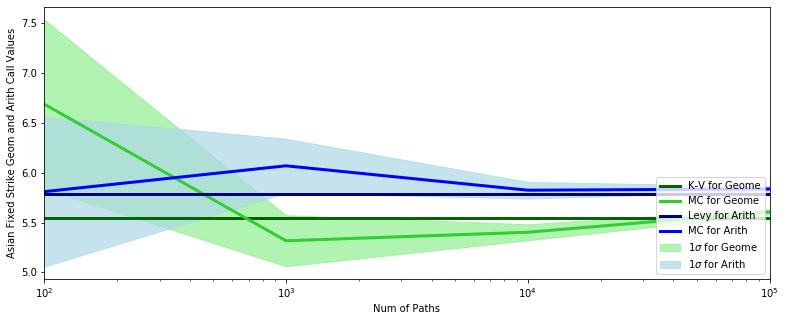

In [38]:
# plot the results
( asian_fixed_df.iloc[:,[0,1,3,4]]
      .plot.line(logx=True,
                 lw=3,
                 color=['darkgreen','limegreen','navy','blue'],
                 figsize=(13,5)
                )
)

# adorn the pot with shaded error areas
ax = plt.gca()
df = asian_fixed_df
plt.xscale('log')
ax.fill_between(df.index, 
                df['MC for Geome'] + df['Err for Geome'],
                df['MC for Geome'] - df['Err for Geome'],
                label='$1\sigma$ for Geome',
                alpha=.7, color='lightgreen'
               )
ax.legend()
ax.fill_between(df.index, 
                df['MC for Arith'] + df['Err for Arith'],
                df['MC for Arith'] - df['Err for Arith'],
                label='$1\sigma$ for Arith',
                alpha=.7, color='lightblue'
               )
ax.legend(loc='lower right')
ax.set_ylabel('Asian Fixed Strike Geom and Arith Call Values');

Notes:
- In MC simulations, the errors decrease with the number of simulated paths, ie. $\epsilon = \frac {\sigma}{\sqrt N}$
- the more $N = 10^4$, the more MC simulations converge with the analytical values

## Price characteristics

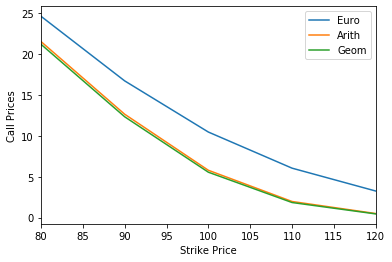

In [39]:
# compute the Asian option prices for different strikes
call_values = []
for strike in np.linspace(80,120,5).astype(int):
    call_values.append((strike,
                        bsm_euro_call_value(S0,K=strike,T=T,r=r,σ=σ),
                        levy_asian_fixed_strike_arith_call_value(S0,K=strike,T=T,r=r,σ=σ),
                        kv_asian_fixed_strike_geome_call_value(S0,K=strike,T=T,r=r,σ=σ),))
    
    
call_values_df = pd.DataFrame(call_values, columns=['Strike Price','Euro','Arith','Geom'])
call_values_df.set_index('Strike Price',inplace=True)
call_values_df.plot.line()
plt.ylabel('Call Prices');    

In [40]:
# compute the Asian option prices for different number of time steps
call_values = []
for ts in np.logspace(1,4,4).astype(int):
    call_values.append((ts,
                        *mc_wur_asian_fixed_strike_geome_call_value(S0,K,T,r,σ,Ts=ts,N=N,ret_err=True),
                        *mc_wur_asian_fixed_strike_arith_call_value(S0,K,T,r,σ,Ts=ts,N=N,ret_err=True),
                      ))
    
call_values_df = pd.DataFrame(call_values,columns=['Num of Ts',
                                                   'MC for Geome','Err for Geome',
                                                   'MC for Arith','Err for Arith'])
call_values_df.set_index('Num of Ts',inplace=True)
call_values_df

,MC for Geome,Err for Geome,MC for Arith,Err for Arith
Num of Ts,,,,
10,6.121766,0.089118,6.257293,0.091937
100,5.618902,0.081645,5.989416,0.086476
1000,5.546679,0.081061,5.667547,0.082241
10000,5.555005,0.081055,5.849880,0.083349


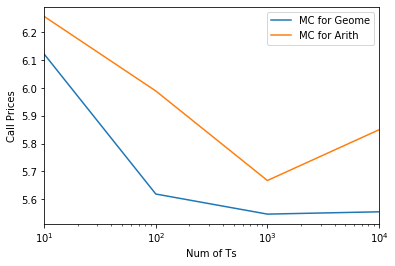

In [41]:
call_values_df.iloc[:,[0,2]].plot.line(logx=True)
plt.ylabel('Call Prices');

Notes
- arithmetic fixed strike Asians are always more (or equally) expensive as their geometric counter-parts
- the comparable Europeans are still more expensive than both types of Asians
(the intuition here is that since the payoff of an Asian option is based on an average price of the underlying asset, it is less volatile than the asset price itself, and the option on a lower volatility asset is worth less)
- the price of Asian call options decreases when number of time steps (Ts) increases
(the intuition here is that the pricing fluctuations are averaged more frequently (sampling frequency increases), hence the volatility is reduced)

###### THE END